# Assignment Two
## Task C: XOR-operator

In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [21]:
class Model:
    def __init__(self):
        
        '''
        # Not converging
        self.W1 = torch.tensor([[0.0, 0.0], [0.0, 0.0]], dtype=torch.float, requires_grad=True)
        self.b1 = torch.tensor([[0.0, 0.0]], dtype=torch.float, requires_grad=True)
        self.W2 = torch.tensor([[0.0], [0.0]], dtype=torch.float, requires_grad=True)
        self.b2 = torch.tensor([[0.0]], dtype=torch.float, requires_grad=True)
        '''
        
        # Converging
        self.W1 = torch.tensor([[0.7 , -0.6], [0.2, -0.6]], requires_grad=True)  
        self.W2 = torch.tensor([[0.3], [0.4]], requires_grad=True)  
        self.b1 = torch.tensor([[0.5, 0.2]], requires_grad=True)
        self.b2 = torch.tensor([[0.4]], requires_grad=True)
        
        
    def logits(self, x):
        return x @ self.W2 + self.b2
    
    def f1(self, x):
        return torch.sigmoid(x @ self.W1 + self.b1)
    
    def f2(self, x):
        return torch.sigmoid(x @ self.W2 + self.b2)
    
    def F(self, x):
        return self.f2(self.f1(x))
    
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(self.f1(x)), y)

In [22]:
model = Model()

### x_train and y_train based on the XOR-operator

In [23]:
x_train = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y_train = torch.tensor([[0.], [1.], [1.], [0.]])
optimizer = torch.optim.SGD([model.b2, model.W2, model.b1, model.W1], lr=10)

### Training and loss output

In [24]:
for epoch in range(1000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W1 = %s, b = %s, loss = %s" % (model.W1, model.b1, model.loss(x_train, y_train)))
print("W2 = %s, b = %s, loss = %s" % (model.W2, model.b2, model.loss(x_train, y_train)))
print("[0,1] is 1 = ", round(model.F(torch.tensor([0., 1.])).item()))

W1 = tensor([[-6.4710, -8.6105],
        [-6.4730, -8.6351]], requires_grad=True), b = tensor([[9.6601, 3.7578]], requires_grad=True), loss = tensor(0.0011, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
W2 = tensor([[ 14.6112],
        [-14.9010]], requires_grad=True), b = tensor([[-7.0122]], requires_grad=True), loss = tensor(0.0011, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
[0,1] is 1 =  1


### Plotting

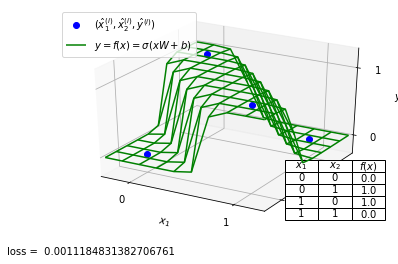

In [25]:
fig = plt.figure()

plot1 = fig.add_subplot(111, projection='3d')

plot1_f = plot1.plot_wireframe(torch.tensor([[]]), torch.tensor([[]]), torch.tensor([[]]), color="green", label="$y=f(x)=\\sigma(xW+b)$")

plot1.plot(x_train[:, 0].squeeze(),
           x_train[:, 1].squeeze(),
           y_train[:, 0].squeeze(),
           'o',
           label="$(\\hat x_1^{(i)}, \\hat x_2^{(i)},\\hat y^{(i)})$",
           color="blue")

plot1_info = fig.text(0.01, 0.02, "")

plot1.set_xlabel("$x_1$")
plot1.set_ylabel("$x_2$")
plot1.set_zlabel("$y$")
plot1.legend(loc="upper left")
plot1.set_xticks([0, 1])
plot1.set_yticks([0, 1])
plot1.set_zticks([0, 1])
plot1.set_xlim(-0.25, 1.25)
plot1.set_ylim(-0.25, 1.25)
plot1.set_zlim(-0.25, 1.25)

table = plt.table(cellText=[[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 0]],
                  colWidths=[0.1] * 3,
                  colLabels=["$x_1$", "$x_2$", "$f(x)$"],
                  cellLoc="center",
                  loc="lower right")



plot1_f.remove()
x1_grid, x2_grid = torch.meshgrid(torch.linspace(-0.25, 1.25, 10), torch.linspace(-0.25, 1.25, 10))
y_grid = torch.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
            a = [[x1_grid[i, j], x2_grid[i, j]]]
            x_plot = torch.FloatTensor(a)
            y_grid[i, j] = model.F(x_plot)
plot1_f = plot1.plot_wireframe(x1_grid.detach(), x2_grid.detach(), y_grid.detach(), color="green")

plot1_info.set_text(f"loss =  {(model.loss(x_train, y_train))}")

table._cells[(1, 2)]._text.set_text("${%.1f}$" % model.F(x_train[0]))
table._cells[(2, 2)]._text.set_text("${%.1f}$" % model.F(x_train[1]))
table._cells[(3, 2)]._text.set_text("${%.1f}$" % model.F(x_train[2]))
table._cells[(4, 2)]._text.set_text("${%.1f}$" % model.F(x_train[3]))

fig.canvas.draw()

plt.show()

#### Graph visualizes the XOR-operator
#### x1, x2 = 0 and x1, x2 = 1 gives y = 0
#### x1 = 1, x2 = 0 and x1 = 0, x2 = 1 gives y = 1